Mahan Madani - 99222092
Assignment 5 - BigBasket Dataset

## Load Dataset and analyze data

In [379]:
# Load basic libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob

from sklearn.neighbors import NearestNeighbors

In [339]:
df = pd.read_csv("BigBasket Products.csv")
print(df.columns)
print(df.shape)

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')
(27555, 10)


In [340]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [341]:
df.describe(include=['object'])

,product,category,sub_category,brand,type,description
count,27554,27555,27555,27554,27555,27440
unique,23540,11,90,2313,426,21944
top,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,Face Care,A brand inspired by the Greek goddess of victo...
freq,26,7867,2294,638,1508,47


In [342]:
df.head(3)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


## Basic Data Analysis



<h4>Check for Duplicate Values</h4>

In [344]:
columns_to_check_duplicates = list(df.columns)
columns_to_check_duplicates.remove('index')
print(columns_to_check_duplicates)\

duplicated = df.duplicated(subset=columns_to_check_duplicates, keep=False)
duplicate_rows = df[duplicated]

if not duplicate_rows.empty:
    print("Duplicate records found:")
    print(duplicated.sum())
else:
    print("No duplicate records found.")

['product', 'category', 'sub_category', 'brand', 'sale_price', 'market_price', 'type', 'rating', 'description']
Duplicate records found:
707


In [345]:
df_no_duplicates = df.drop_duplicates(subset=columns_to_check_duplicates, keep='first')
df = df_no_duplicates.reset_index(drop=True)
print("Dataframe with no duplicate values:")
print(df.shape)

Dataframe with no duplicate values:
(27201, 10)


<h4>Handle Null Values</h4>

In [346]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8463
description,113


In [347]:
df['rating'].fillna(0, inplace=True)
df['description'].fillna('', inplace=True)
df = df.dropna().reset_index(drop=True)

In [348]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0
description,0


<h4>Detect Outlier Values

In [382]:
z_scores = pd.DataFrame(zscore(df['sale_price']))

threshold = 3
outliers = df[(z_scores.abs() > threshold).any(axis=1)]

print("Outlier records:")
print(outliers.shape)

Outlier records:
(519, 14)



## Feature Engineering



<h4>Genrate new features</h4>

In [349]:
df['discount'] = df['market_price'] - df['sale_price']

In [350]:
df['discount percent'] = df['discount'] / df['market_price']

<h4>Utilize NLP to extract Sentiment & polarity of the descirption</h4>

In [351]:
df['description'] = df['description'].str.lower()

In [352]:
df["polarity"] =  df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df['description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [354]:
df.head(2)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount,discount percent,polarity,subjectivity
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,this product contains garlic oil that is known...,0.0,0.0,0.166667,0.233333
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"each product is microwave safe (without lid), ...",0.0,0.0,0.450000,0.650000


## Visualization

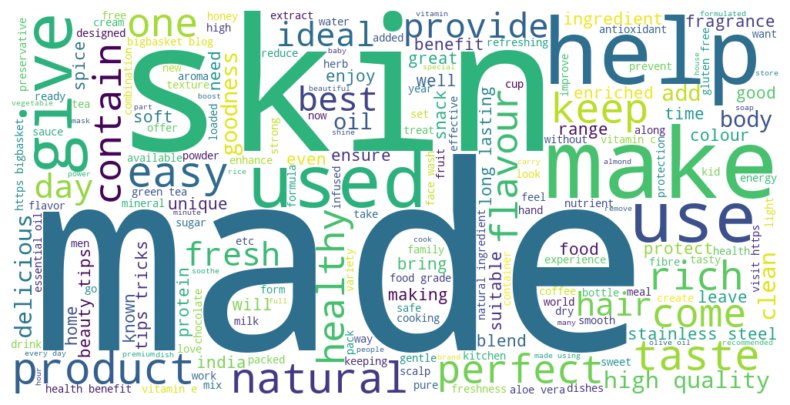

In [355]:
text_corpus = ' '.join(df['description'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

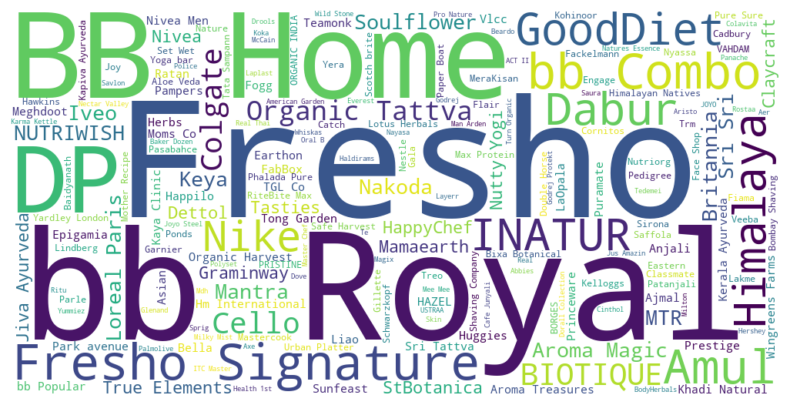

In [356]:
text_corpus = ' '.join(df['brand'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

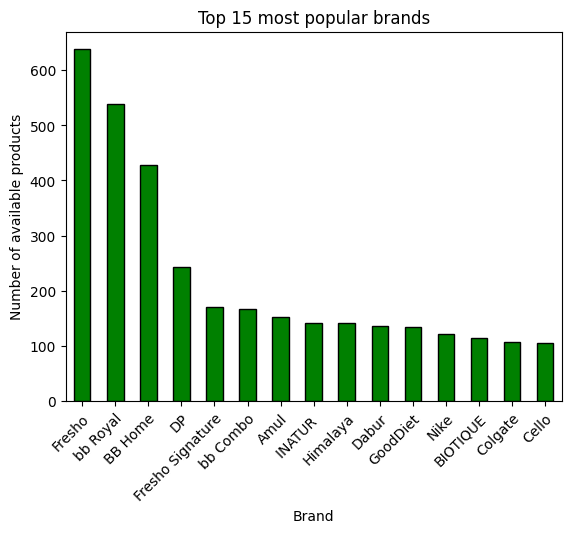

In [383]:
df['brand'].value_counts().head(15).plot(kind='bar', color='green', edgecolor='black')

plt.title('Top 15 most popular brands')
plt.ylabel('Number of available products')
plt.xlabel('Brand')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

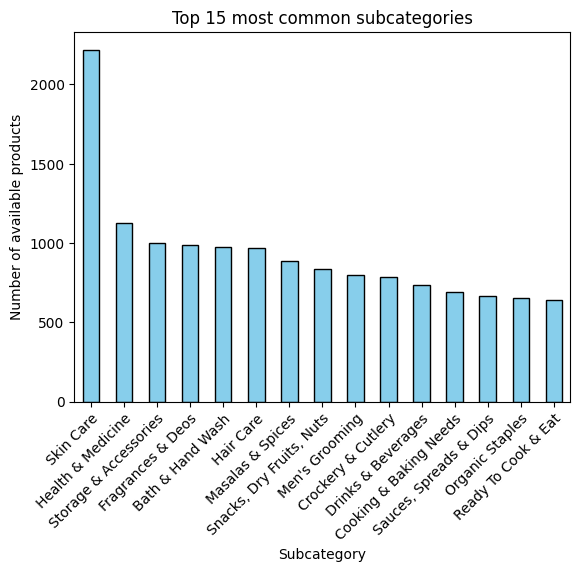

In [358]:
df['sub_category'].value_counts().head(15).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 15 most common subcategories')
plt.ylabel('Number of available products')
plt.xlabel('Subcategory')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

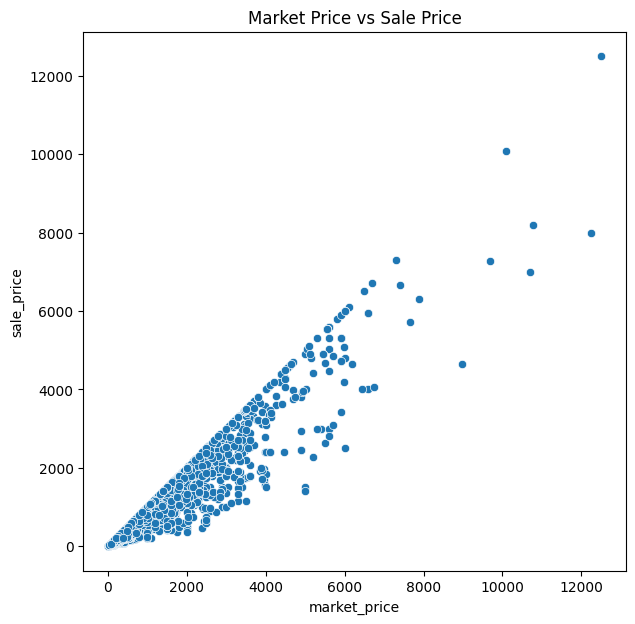

In [359]:
plt.figure(figsize=[7,7])
ax = sns.scatterplot(y='sale_price',
                x='market_price',
                data=df)
ax.set_title('Market Price vs Sale Price')
plt.show()

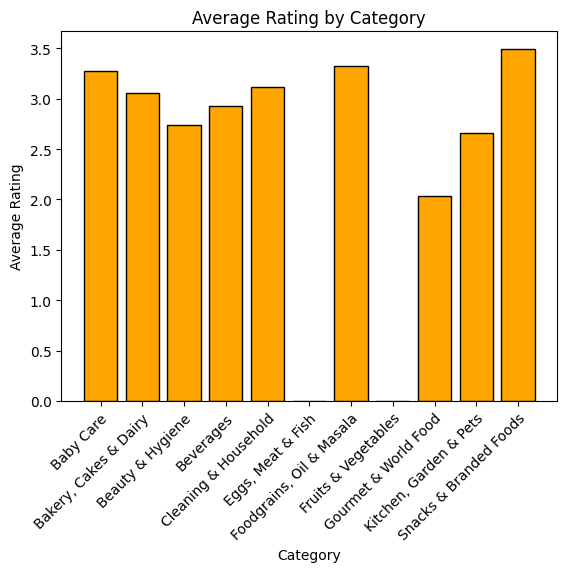

In [360]:
average_ratings = df.groupby('category')['rating'].mean().reset_index()
plt.bar(average_ratings['category'], average_ratings['rating'], color='orange', edgecolor='black')

plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

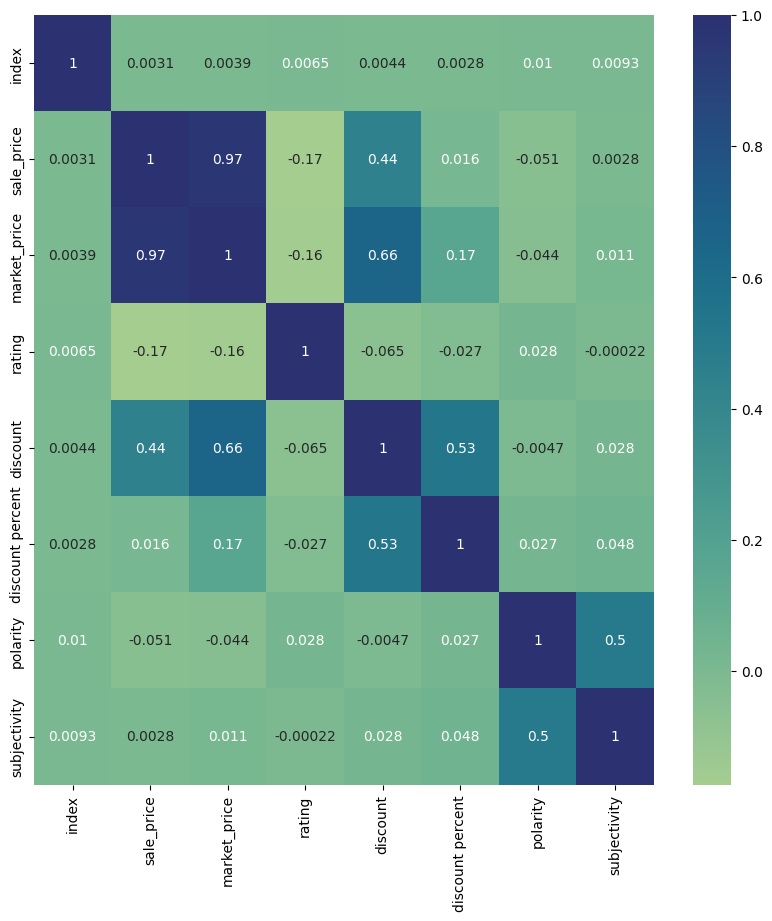

In [361]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')
plt.show()

## Feature transformation

Categorical features must be one-hot encoded where possible.
<br>I used a TF-IDF vectorizer for the 'brand' column due to the high number of values in this column

In [362]:
# Use One-hot encoding for Category
encoded_category = pd.get_dummies(df['category'], prefix='category')

# Use One-hot encoding for Subcategory
encoded_subcategory = pd.get_dummies(df['sub_category'], prefix='sub_category')

# Use One-hot encoding for Type
encoded_type = pd.get_dummies(df['type'], prefix='type')
SVD = TruncatedSVD(n_components=100)
encoded_type = pd.DataFrame(SVD.fit_transform(encoded_type))

In [363]:
new_columns = {i: f'type{i}' for i in range(100)}
encoded_type.rename(columns=new_columns, inplace=True)

In [364]:
# Use TF-IDF for brand names
tfidf_vectorizer = TfidfVectorizer()
brand_matrix = tfidf_vectorizer.fit_transform(df['brand'])

SVD = TruncatedSVD(n_components=100)
brand_matrix = SVD.fit_transform(brand_matrix.toarray())
encoded_brand = pd.DataFrame(brand_matrix)

In [365]:
new_columns = {i: f'brand{i}' for i in range(100)}
encoded_brand.rename(columns=new_columns, inplace=True)

In [366]:
# Scale numerical features
numerical_features = ['sale_price', 'market_price', 'rating', 'discount', 'discount percent',
                      'polarity', 'subjectivity']
numerical_data = df[numerical_features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_data)
numerical_data = pd.DataFrame(scaled_features, columns=numerical_data.columns)

In [367]:
numerical_data.head()

,sale_price,market_price,rating,discount,discount percent,polarity,subjectivity
0,-0.207351,-0.275381,0.718164,-0.349493,-0.808651,-0.509359,-1.972830
1,-0.289504,-0.344066,-0.216711,-0.349493,-0.808651,1.056961,0.581070
2,-0.414787,-0.223868,0.354601,0.421068,2.768607,1.458412,1.716947
3,-0.353173,-0.350935,0.510414,-0.190675,0.238647,0.149100,-0.012349
4,-0.326473,-0.374974,0.873976,-0.349493,-0.808651,0.688415,-0.101389


Combine numerical features with encoded features:

In [368]:
combined_features = pd.concat([
    numerical_data,
    encoded_category,
    encoded_subcategory,
    encoded_type,
    encoded_brand
    ], axis=1)

In [369]:
combined_features.shape

(27199, 308)

In [370]:
def convert_to_numeric(column):
    return pd.to_numeric(column, errors='coerce')

combined_features = combined_features.apply(convert_to_numeric)
combined_features.columns = combined_features.columns.astype(str)

combined_features.fillna(0, inplace=True)

## Recommender System

The Recommender system is built using the K-nearest neighbors algorithm.

In [371]:
print(df.shape)
print(combined_features.shape)

(27199, 14)
(27199, 308)


In [372]:
recommender = NearestNeighbors(metric='cosine', algorithm='brute')
recommender.fit(combined_features.values)

NearestNeighbors(algorithm='brute', metric='cosine')

In [373]:
def print_products(target_product_name, indices):
    target_product_index = df[df['product'] == target_product_name].index[0]
    target_product = df.iloc[target_product_index]
    
    print(f"{target_product['product']:<70} rating: {target_product['rating']:<7} "
          f"price: {target_product['sale_price']:<8} type: {target_product['type']:<20}")
    print(f"The recomended products are:\n")

    product_list = df.iloc[indices]
    
    for index, product in product_list.iterrows():
        print(f"{product['product']:<70} rating: {product['rating']:<7} price: {product['sale_price']:<8} type: {product['type']:<20}")


In [386]:
def recommend_products(target_product_name, k=5):
    target_product_index = df[df['product'] == target_product_name].index[0]
    traget_product = combined_features.iloc[target_product_index].values.reshape(1, -1)

    distances, indices = recommender.kneighbors(traget_product, n_neighbors=k+1)
    indices = indices[0].tolist()
    
    indices.remove(target_product_index)
    return indices

In [375]:
df['product'].head(5)

0               Garlic Oil - Vegetarian Capsule 500 mg
1                                Water Bottle - Orange
2                       Brass Angle Deep - Plain, No.2
3    Cereal Flip Lid Container/Storage Jar - Assort...
4                   Creme Soft Soap - For Hands & Body
Name: product, dtype: object

In [389]:
target = 'Creme Soft Soap - For Hands & Body'
k = 10
product_list = recommend_products(target, k)
print_products(target, product_list)

Creme Soft Soap - For Hands & Body                                     rating: 4.4     price: 162.0    type: Bathing Bars & Soaps
The recomended products are:

Creme Care Soap - For Hands & Body                                     rating: 4.1     price: 158.0    type: Bathing Bars & Soaps
Creme Care Soap - For Hands & Body                                     rating: 4.5     price: 85.0     type: Bathing Bars & Soaps
Soap - Creme Care                                                      rating: 4.0     price: 100.0    type: Bathing Bars & Soaps
Creme Care Soap - For Hands & Body                                     rating: 4.3     price: 54.0     type: Bathing Bars & Soaps
Creme Soft Soap - For Hands & Body                                     rating: 4.2     price: 85.0     type: Bathing Bars & Soaps
Creme Care Soap - For Hands & Body                                     rating: 4.4     price: 162.0    type: Bathing Bars & Soaps
Gel Bathing Bar - Bearberry & Blackcurrant                  

In [387]:
target = 'Water Bottle - Orange'
product_list = recommend_products(target)
print_products(target, product_list)

Water Bottle - Orange                                                  rating: 2.3     price: 180.0    type: Water & Fridge Bottles
The recomended products are:

Water Bottle - A5 Note Book, Assorted Colour                           rating: 2.7     price: 299.0    type: Water & Fridge Bottles
Square Pet water Bottle - Violet                                       rating: 3.0     price: 195.0    type: Water & Fridge Bottles
Rectangular Plastic Container - With Lid, Multicolour                  rating: 3.0     price: 188.0    type: Containers Sets     
Square PP Plastic Fridge Bottles - Orange                              rating: 4.0     price: 169.0    type: Water & Fridge Bottles
Suzzan Glass Bottle With Blue Cap                                      rating: 0.0     price: 290.0    type: Water & Fridge Bottles


In [378]:
target = df.iloc[18273]['product']
k = 10
product_list = recommend_products(target, k)
print_products(target, product_list)

Dry Fruit Apple                                                        rating: 0.0     price: 123.5    type: Dry Fruits & Berries
The recomended products are:

Amla Dry Fruit                                                         rating: 0.0     price: 93.1     type: Dry Fruits & Berries
Just Berries - Dehydrated Candied Fruits                               rating: 0.0     price: 188.1    type: Dry Fruits & Berries
Fruits, Nuts & Berries - Vegan                                         rating: 0.0     price: 188.1    type: Dry Fruits & Berries
Dry Fruits & Nuts                                                      rating: 0.0     price: 189.0    type: Dry Fruits & Berries
Dry Fruit Papaya                                                       rating: 0.0     price: 49.0     type: Dry Fruits & Berries
Dry Fruit Plum                                                         rating: 0.0     price: 49.0     type: Dry Fruits & Berries
Dry Fruit Pineapple                                         